# LFA - Projet 2017
## Steroïds et BMI

### Simon Baehler et Thibault Schowing

#### Contexte 

Les données proviennent du projet SKIPOGH. *SKIPOGH (Swiss Kidney Project on Genes in Hypertension) est l’acronyme du Projet Suisse sur la génétique de l’hypertension et du rein; son but est d'explorer le rôle de la génétique et de l'environnement (la nutrition, l'activité physique et le mode de vie) sur la régulation de la pression sanguine ainsi que la fonction des reins. SKIPOGH vise également à enrichir les connaissances sur les statuts de santé des habitants des cantons de Lausanne, Genève et Berne. Cette étude permettra aux scientifiques d'évaluer à quel degré les paramètres tels que la tension, la taille des reins et ses fonctions, le poids corporel et le métabolisme sont héréditaires. L'étude SKIPOGH fait partie de EPOGH (Projet européen sur les gènes dans l'hypertension), une étude internationale explorant les déterminants génétiques de la tension artérielle (BP) dans la population générale et suit en grande partie le même protocole standardisé.* (http://www.skipogh.ch, Consulté le 09.03.2017)


Ce set de données contient des informations concernant les quantités de divers stéroïdes naturels dans plus de 1’120 personnes. Ce set de données est composé de 40 variables d’entrée qui représentent, chacune, 1 stéroïde différent exprimée par une valeur continue et une variable de sortie représentant la valeur de l’IMC.


**Quel est la provenance des données (c'est bien skipogh ?) ça vient de l'urine ou du sang ? Quelles sont les unités de mesures ?**

-> urine (test cumulé 12h journée 12h nuit ou 24h - vérifier) 
## Todo: 


|Variable	|Info|
|----------|----------|
|ccr_andro_d	|androgens|
|ccr_etio_d	|androgens|
|ccr_s_ad_17b_d	|androgens|
|ccr_s_at_d	|androgens|
|ccr_sa_dihydrotest_d	|androgens|
|ccr_saad3a17b_d	|androgens|
|ccr_testosterone_d	|androgens|
|ccr_estriol_d	|estrogens|
|ccr_l7b_estradiol_d	|estrogens|
|ccr_dha_d	androgen |precursors|
|ccr_l6a_oh_dha_d	|androgen precursors|
|ccr_s_pt_d	|androgen precursors|
|ccr_tha_d	|mineralocorticoid and precursors|
|ccr_thb_d	|mineralocorticoid and precursors|
|ccr_sa_thb_d	|mineralocorticoid and precursors|
|ccr_thaldo_d	|mineralocorticoid and precursors|
|ccr_thdoc_d	|mineralocorticoid and precursors|
|ccr_l8_oh_tha_d	|mineralocorticoid and precursors|
|ccr_pd_d	|glucocorticoid precursors|
|ccr_l7_HP_d	|glucocorticoid precursors|
|ccr_pt_d|	glucocorticoid precursors|
|ccr_pt_one_d|	glucocorticoid precursors|
|ccr_ths_d	|glucocorticoid precursors|
|ccr_cortisol_d	|glucocorticoids|
|ccr_l8_oh_f_d	|glucocorticoids|
|ccr_thf_d|	glucocorticoids|
|ccr_sa_thf_d|	glucocorticoids|
|ccr_a_cortol_d	|glucocorticoids|
|ccr_b_cortol_d	|glucocorticoids|
|ccr_llb_oh_andro_d|	glucocorticoids|
|ccr_llb_oh_etio_d	|glucocorticoids|
|ccr_cortisone_d	|glucocorticoids|
|ccr_the_d	|glucocorticoids|
|ccr_a_cortolone_d	|glucocorticoids|
|ccr_b_cortolone_d	|glucocorticoids|
|ccr_ll_oxo_etio_d|	glucocorticoids|
|ccr_sb_oh_f_d	|glucocorticoids|
|ccr_zoa_dhe_d|	glucocorticoids|
|ccr_zoa_dhf_d	|glucocorticoids|
|ccr_zob_dhe_d|	glucocorticoids|
|ccr_zob_dhf_d| Glucocorticoids|
|IMC	|Indice de masse corporelle|


# Question de recherche

L'objectif de ce projet est de savoir si l'indice de masse corporelle (IMC ou BMI en anglais) est lié à la quantité de stéroïdes présents dans le corps. Dans le cas où l'algorithme nous permettrait de réaliser une bonne classification, il faudrait trouver quels sont les stéroïdes qui sont les plus affectés par l'IMC. Dans le cas ou la classification ne serait pas pertinante, d'autres questions pourraient être posées, par exemple déterminer s'il y a un impact des stéroïdes sur la pression systolique ou diastolique. 




# Exploration



<type 'file'>


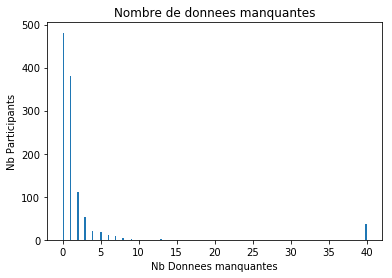

In [1]:
import os
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.spatial.distance as ssd
from random import randint
from random import shuffle
import glob
import plotly.plotly as py
import pylab as P

%matplotlib inline 



# other datas
# Skipogh Steroids_cat2.csv
path = './datas/'

# Reading file
records_matrix = open(path + 'Skipogh Steroids_original.csv')


print type(records_matrix)

# Reading the data 
matrice =  [l.strip().split(';') for l in records_matrix.readlines()[0::]]

# Reading the first line
records_matrix.seek(0)
steroid = records_matrix.readlines()[0].strip().split(';')


# Conversion of read lists to ndarrays.
matrice = np.array(matrice)
steroid = np.array(steroid[1:])



#Calcul du nombre de participants avec x € [0 - 40] données (stéroides) manquantes
def missing_(matrice):

    missing_participant = []

    i = 0
    for participant in matrice:
        missing_participant.append([participant[0]])

        missing = 0
        for data in participant[1:-1]:

            if(data == ''):
                missing = missing + 1

        missing_participant[i].append(missing)
        i = i + 1


    missing_participant = np.array(missing_participant)
    transposed = missing_participant.transpose()
    transposed_val_int = []
    for elem in transposed[1]:
        transposed_val_int.append(int(elem))


    plt.ylabel("Nb Participants")
    plt.xlabel("Nb Donnees manquantes")
    plt.hist(transposed_val_int,  bins='auto')
    plt.title("Nombre de donnees manquantes")
    plt.show()

missing_(matrice)

On remarque qu'une grande quantité de participants n'ont aucune donnée manquante et que ce chiffre va à la baisse jussqu'à 1 participants qui a 13 données manquantes. Exception pour 36 personnes qui ont 40 données manquantes, soit la totalité des données qui sont abscente. 

Pour les participants qui ont des données en moins, il va falloir soit les supprimer soit combler les données vides avec une estimation via les autres valeurs. Les participants dont la totalité des données est manquantes seront ignorés et pour ceux dont quelques données sont abscente, les trous seront comblés en estimant les valeurs manquantes à l'aide des participants dont aucune valeur ne manque. 




In [2]:

def missing_steroid(matrice):
    bySteroid = matrice.transpose()

    missingSteroid = []

    for line in bySteroid[1:-1]:
        compteur = 0
        for elem in line[1:]:

            if elem == '':
                compteur += 1
        tab = [line[0], compteur]
        missingSteroid.append(tab)

    #print np.array(missingSteroid)
    #[l.strip().split(';') for l in records_matrix.readlines()[0::]]
    tmp = np.array(missingSteroid).transpose()
    
    print("Steroïds and number missing")
    names = tmp[0]
    print names
    
    values = [int(l) for l in tmp[1]]
    print values
    
    y_values = values
    text_values = names
    x_values = np.arange(1, len(text_values) + 1, 1)

    plt.figure(figsize=(15,15), dpi=300)
    plt.bar(x_values, y_values)
    # Decide which ticks to replace.
    #new_ticks = [str(y) for y in y_values]

    plt.yticks()
    plt.xticks(x_values, text_values,  rotation='vertical')
    plt.title("Missing Steroid in dataset")
    plt.grid()
    plt.show()


[['' 'ccr_andro_d' 'ccr_etio_d' ..., 'ccr_zob_dhe_d' 'ccr_zob_dhf_d' 'bmi']
 ['0' '90.01550844' '36.93111074' ..., '4.229832662' '' '26.62156178']
 ['1' '53.51625598' '' ..., '3.394848648' '' '21.65728478']
 ..., 
 ['1126' '' '60.53009286' ..., '6.214831155' '9.982483986' '24.5775163']
 ['1127' '108.5834786' '165.7337127' ..., '7.050261907' '30.66490588'
  '24.01241807']
 ['1128' '181.5327551' '108.4946127' ..., '11.74202216' '9.179348582'
  '30.80073749']]
Steroïds and number missing
['ccr_andro_d' 'ccr_etio_d' 'ccr_s_ad_17b_d' 'ccr_s_at_d'
 'ccr_sa_dihydrotest_d' 'ccr_saad3a17b_d' 'ccr_testosterone_d'
 'ccr_estriol_d' 'ccr_l7b_estradiol_d' 'ccr_dha_d' 'ccr_l6a_oh_dha_d'
 'ccr_s_pt_d' 'ccr_tha_d' 'ccr_thb_d' 'ccr_sa_thb_d' 'ccr_thaldo_d'
 'ccr_thdoc_d' 'ccr_l8_oh_tha_d' 'ccr_pd_d' 'ccr_pt_d' 'ccr_pt_one_d'
 'ccr_ths_d' 'ccr_cortisol_d' 'cr_l8_oh_f_d' 'ccr_thf_d' 'ccr_sa_thf_d'
 'ccr_a_cortol_d' 'ccr_b_cortol_d' 'ccr_llb_oh_andro_d' 'ccr_llb_oh_etio_d'
 'ccr_cortisone_d' 'ccr_the_d' 'c

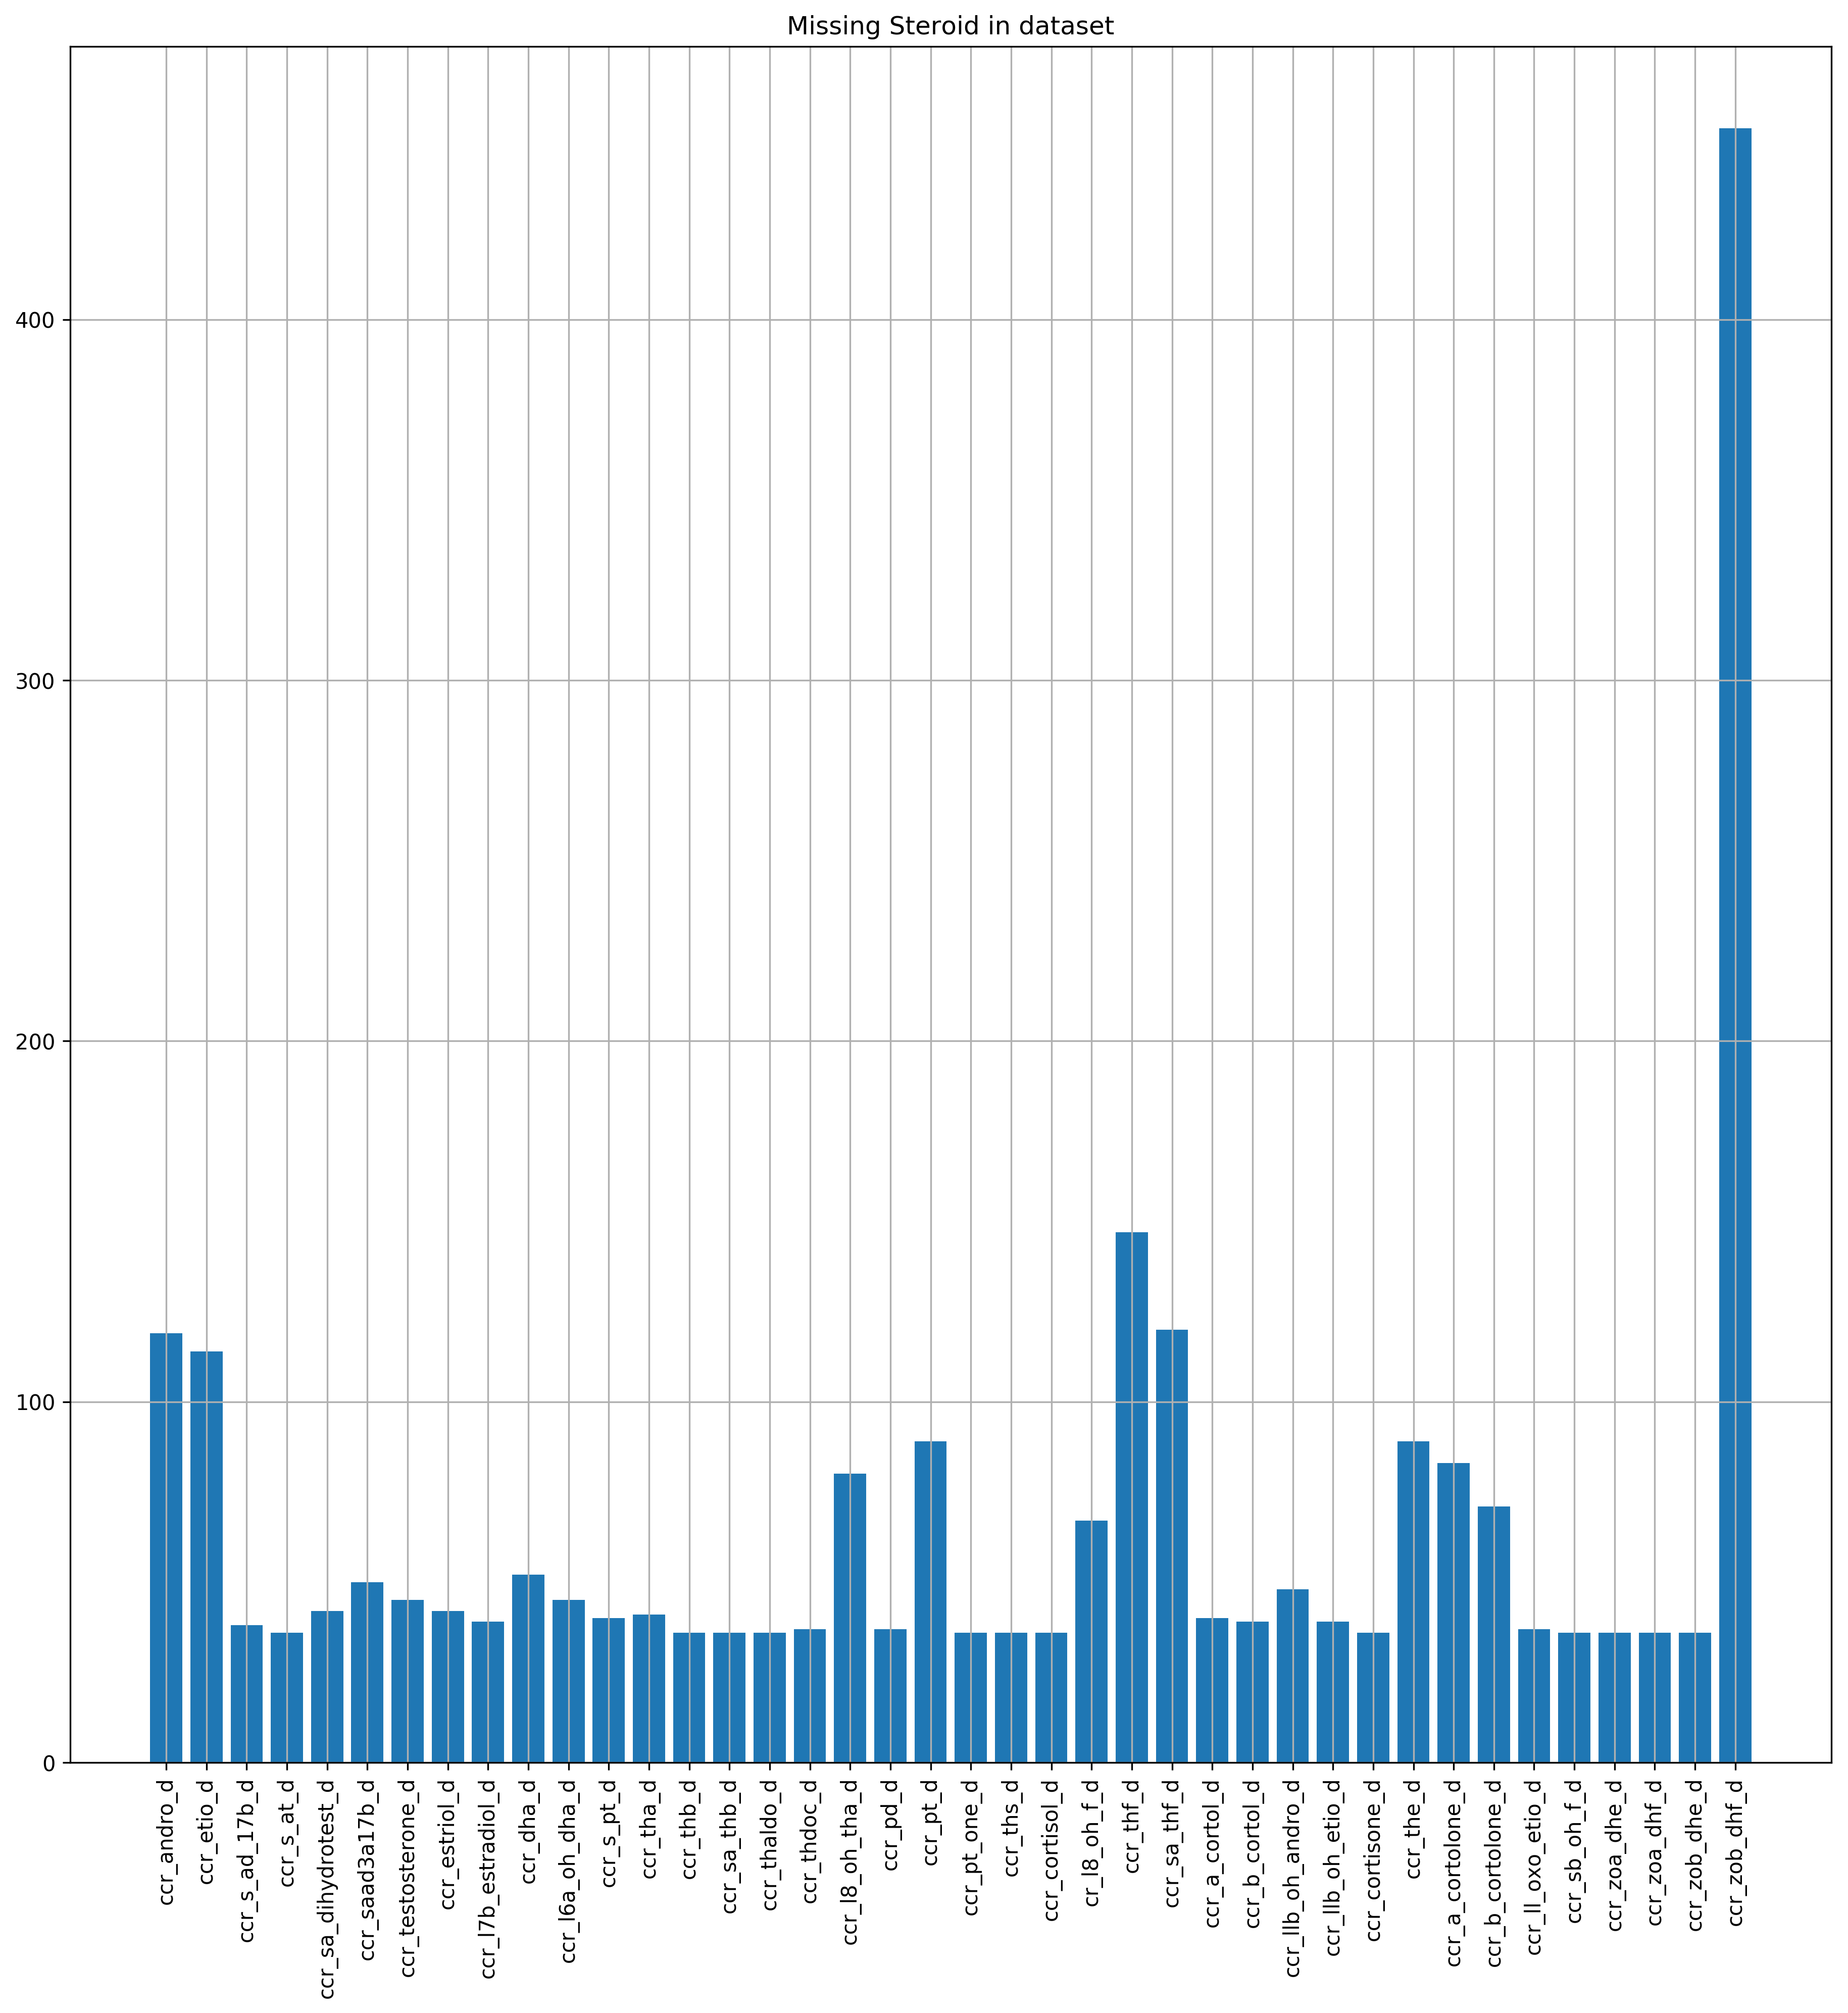

In [3]:
print matrice
missing_steroid(matrice)

Comme on peut le voir ci-dessus, certains steroid manquent en grande quantité aussi.

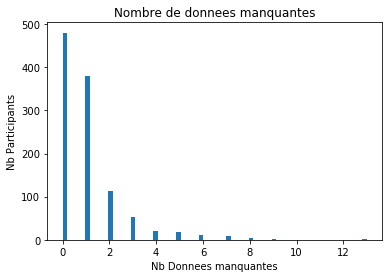

Steroïds and number missing
['ccr_andro_d' 'ccr_etio_d' 'ccr_s_ad_17b_d' 'ccr_s_at_d'
 'ccr_sa_dihydrotest_d' 'ccr_saad3a17b_d' 'ccr_testosterone_d'
 'ccr_estriol_d' 'ccr_l7b_estradiol_d' 'ccr_dha_d' 'ccr_l6a_oh_dha_d'
 'ccr_s_pt_d' 'ccr_tha_d' 'ccr_thb_d' 'ccr_sa_thb_d' 'ccr_thaldo_d'
 'ccr_thdoc_d' 'ccr_l8_oh_tha_d' 'ccr_pd_d' 'ccr_pt_d' 'ccr_pt_one_d'
 'ccr_ths_d' 'ccr_cortisol_d' 'cr_l8_oh_f_d' 'ccr_thf_d' 'ccr_sa_thf_d'
 'ccr_a_cortol_d' 'ccr_b_cortol_d' 'ccr_llb_oh_andro_d' 'ccr_llb_oh_etio_d'
 'ccr_cortisone_d' 'ccr_the_d' 'ccr_a_cortolone_d' 'ccr_b_cortolone_d'
 'ccr_ll_oxo_etio_d' 'ccr_sb_oh_f_d' 'ccr_zoa_dhe_d' 'ccr_zoa_dhf_d'
 'ccr_zob_dhe_d' 'ccr_zob_dhf_d']
[83, 78, 2, 0, 6, 14, 9, 6, 3, 16, 9, 4, 5, 0, 0, 0, 1, 44, 1, 53, 0, 0, 0, 31, 111, 84, 4, 3, 12, 3, 0, 53, 47, 35, 1, 0, 0, 0, 0, 417]


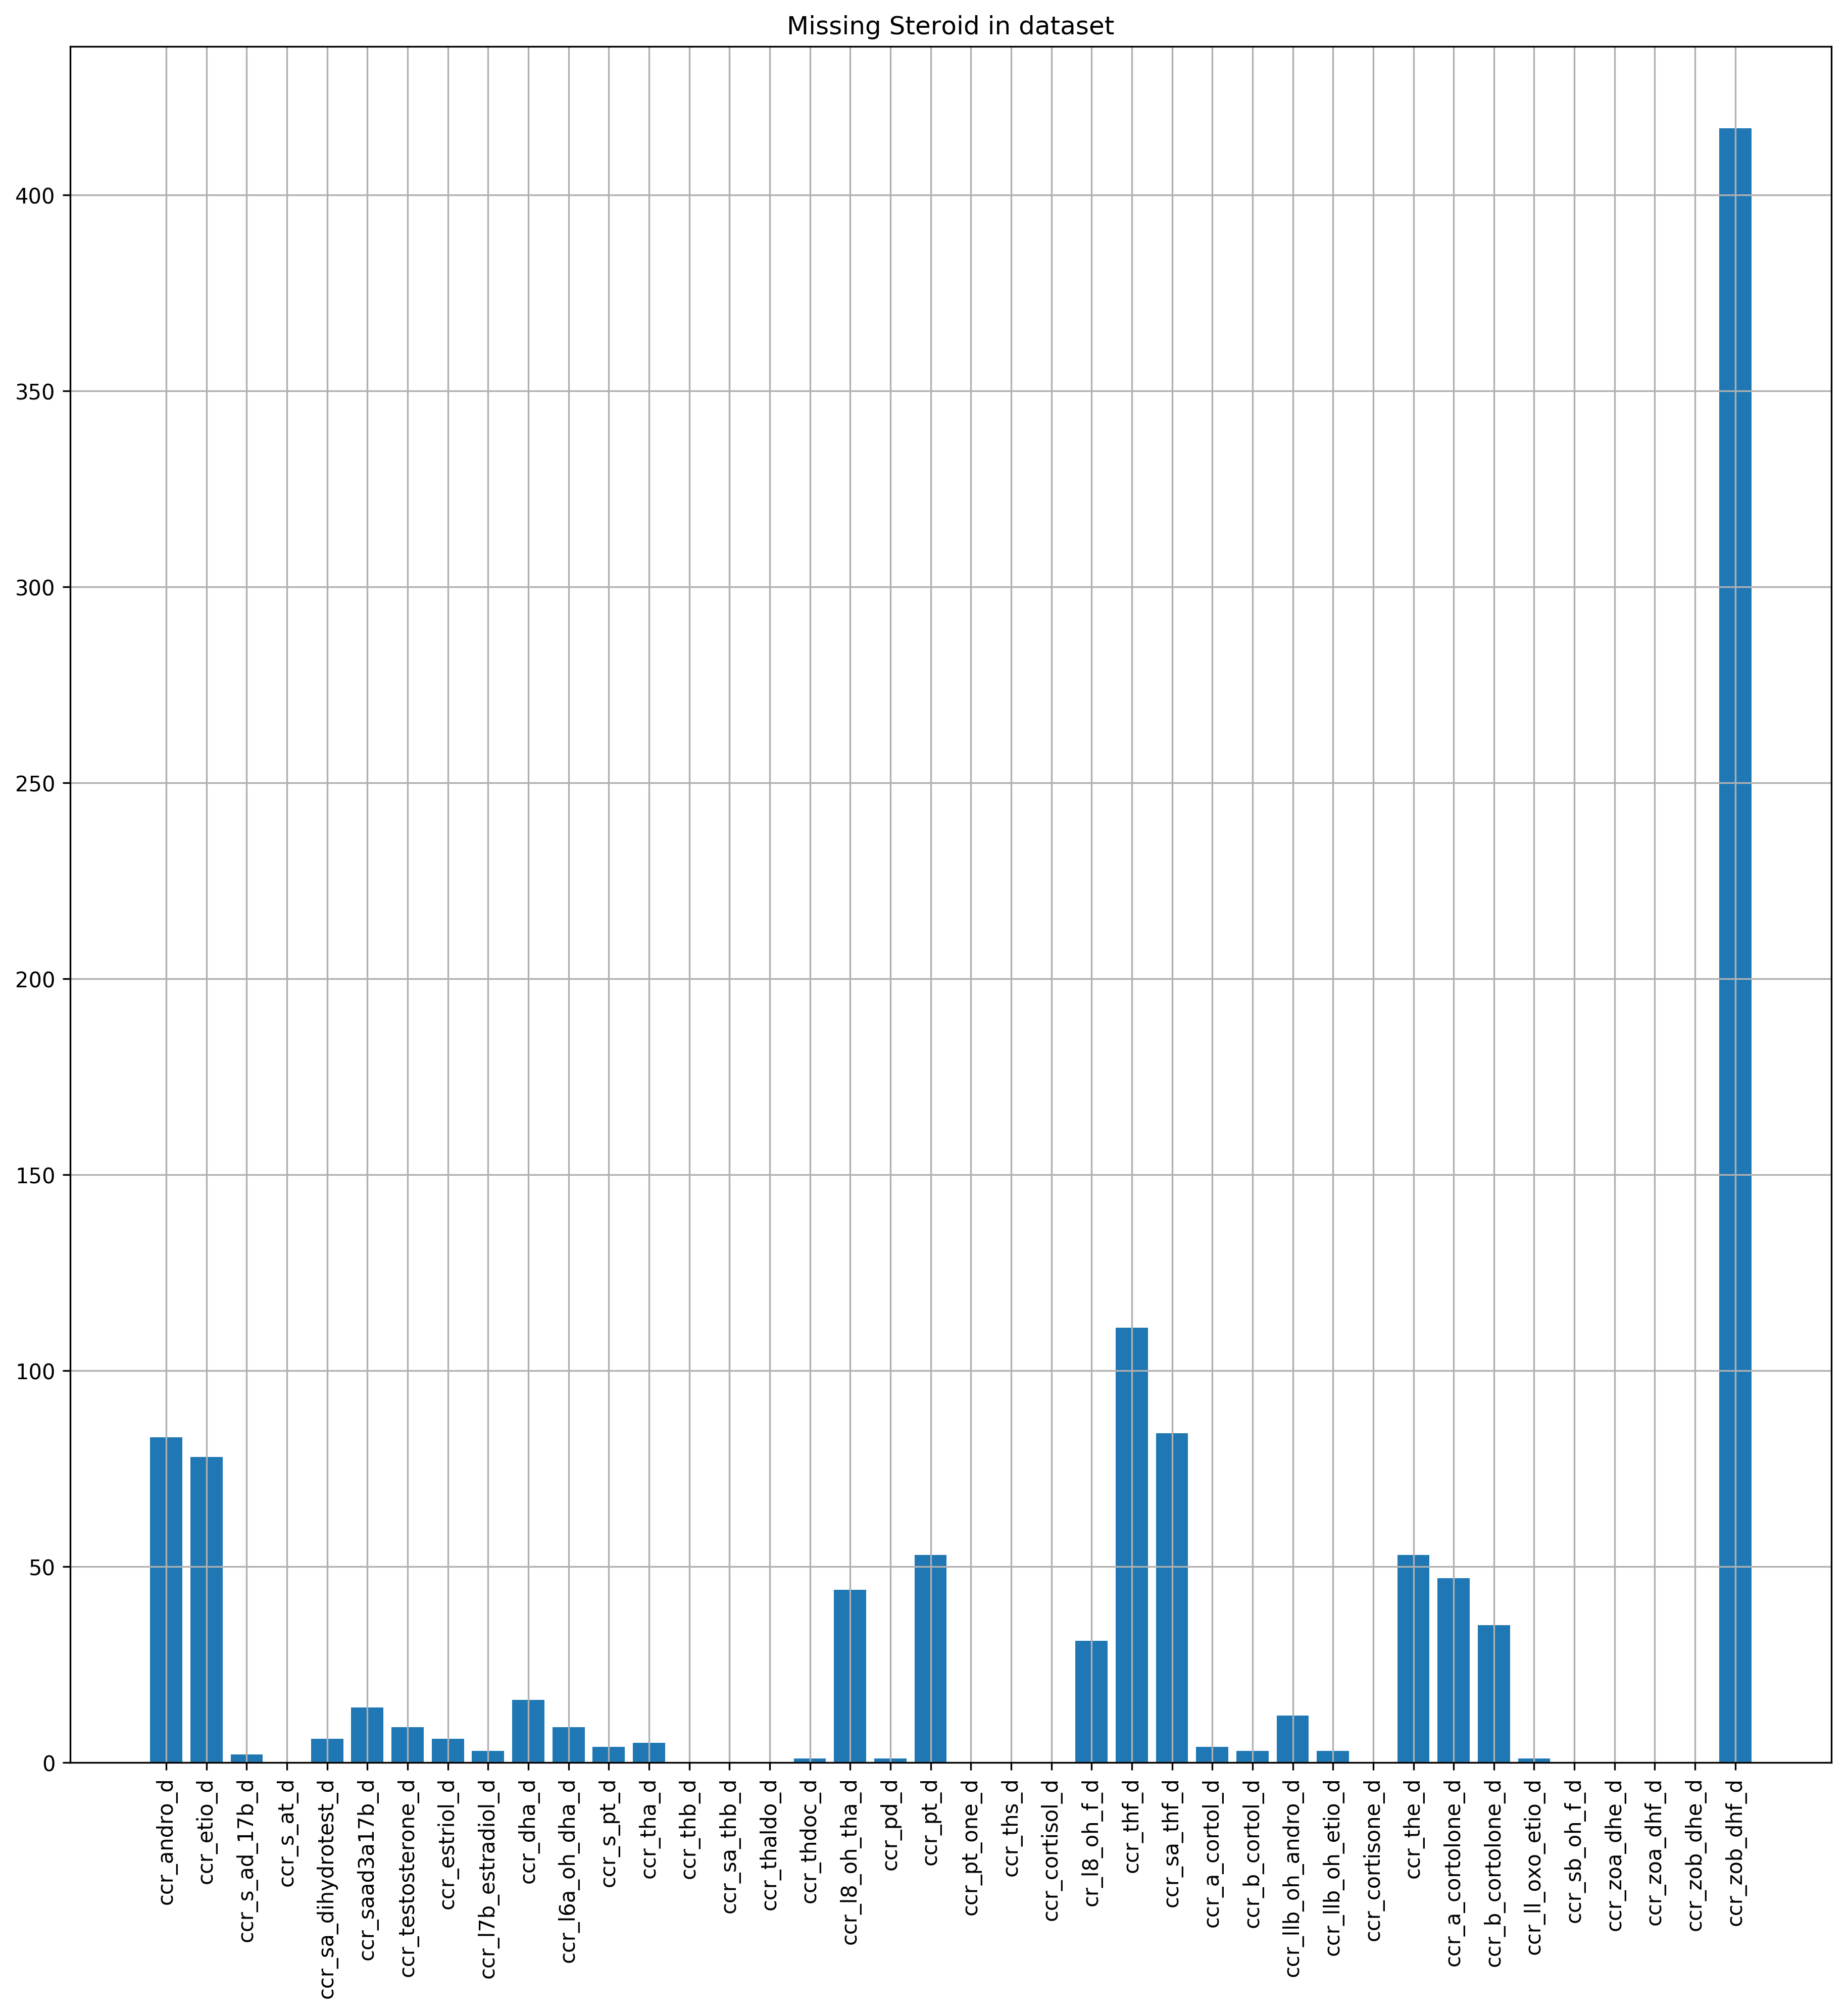

In [4]:

toDelete = []
dataset = []

# Si un participant a plus de LIMIT_MISSING_VALUES manquantes, on le supprime du set.
LIMIT_MISSING_VALUES = 25
dataset.append(matrice[0].tolist())
for i, line in zip( range(len(matrice)), matrice[1:]):
    count = 0
    
    for item in line[1:]:
        if item == '':
            count += 1
    if count >= LIMIT_MISSING_VALUES or line[-1] == '': 
        toDelete.append(i+1)
    else:
        dataset.append(line.tolist())



dataset = np.array(dataset)

missing_(dataset)
missing_steroid(dataset)

Le dataset est maintenant débarassé des participants qui ont LIMIT_MISSING_VALUES ou plus de données manquantes ou qui n'ont pas de BMI. Dans notre cas, 36 participants n'avaient aucune autre données que le BMI, et pas de BMI pour 2 d'entre eux. Ils ont été éliminés du dataset. 



In [5]:
dataset


array([['', 'ccr_andro_d', 'ccr_etio_d', ..., 'ccr_zob_dhe_d',
        'ccr_zob_dhf_d', 'bmi'],
       ['0', '90.01550844', '36.93111074', ..., '4.229832662', '',
        '26.62156178'],
       ['1', '53.51625598', '', ..., '3.394848648', '', '21.65728478'],
       ..., 
       ['1126', '', '60.53009286', ..., '6.214831155', '9.982483986',
        '24.5775163'],
       ['1127', '108.5834786', '165.7337127', ..., '7.050261907',
        '30.66490588', '24.01241807'],
       ['1128', '181.5327551', '108.4946127', ..., '11.74202216',
        '9.179348582', '30.80073749']], 
      dtype='|S20')

[90.01550844 53.51625598 120.6260829 ..., None 108.5834786 181.5327551]
[36.93111074 None 137.4930833 ..., 60.53009286 165.7337127 108.4946127]
[26.62156178 21.65728478 26.31862079 ..., 24.5775163 24.01241807
 30.80073749]


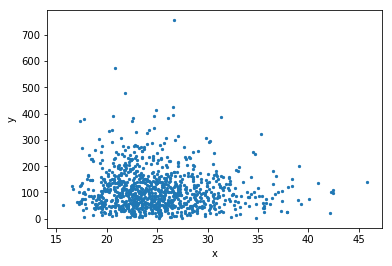

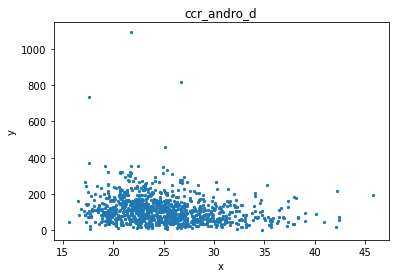

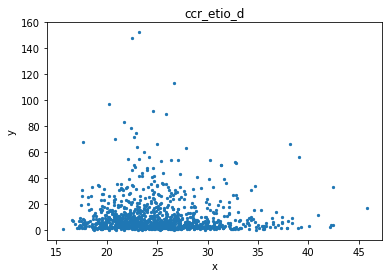

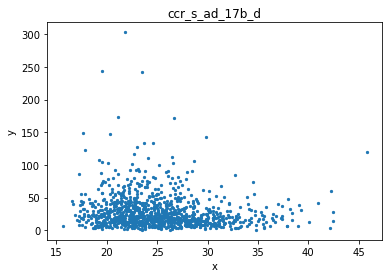

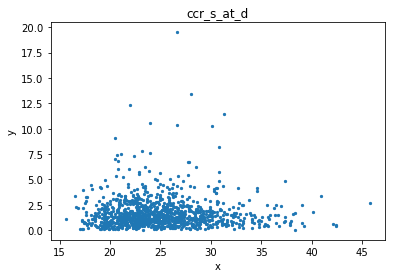

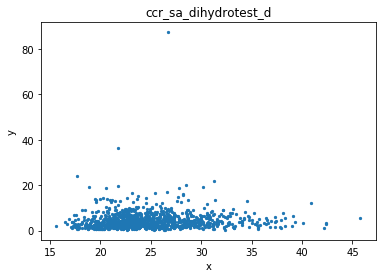

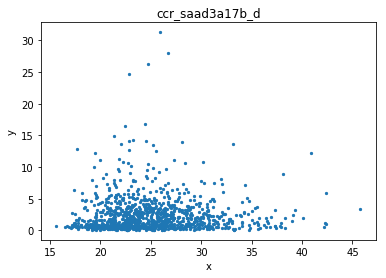

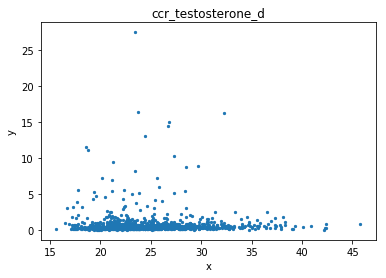

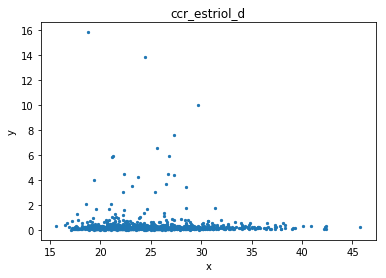

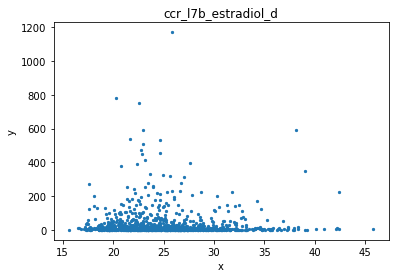

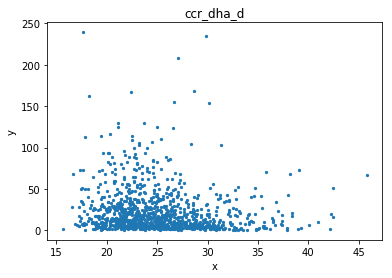

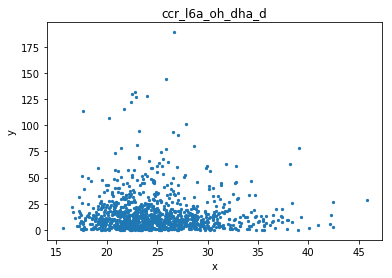

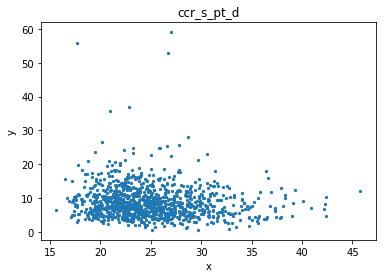

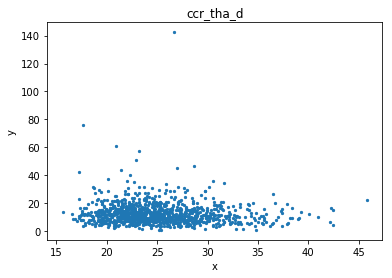

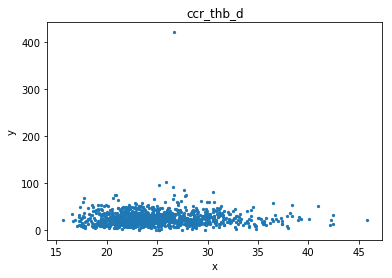

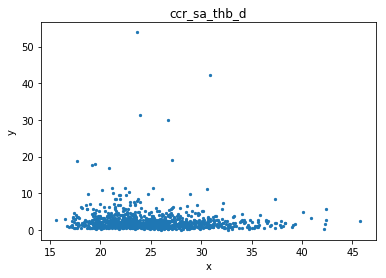

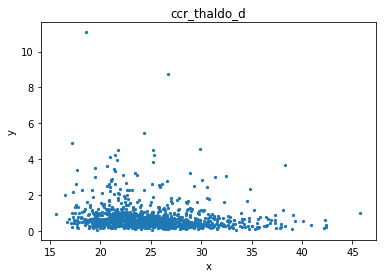

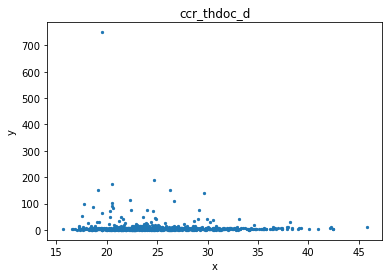

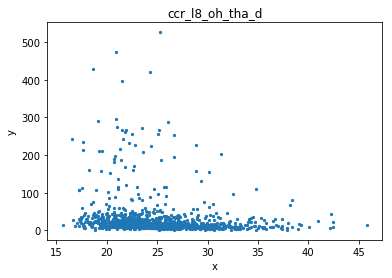

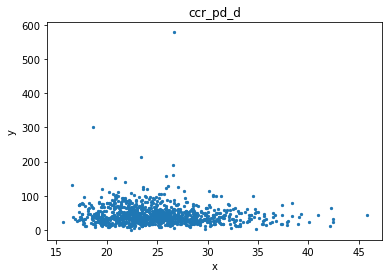

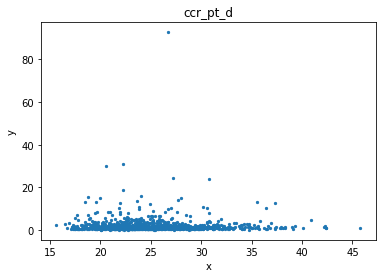

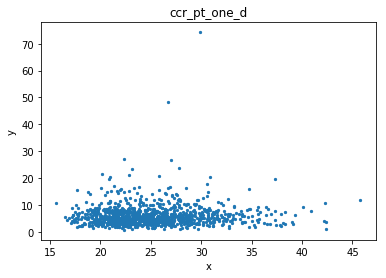

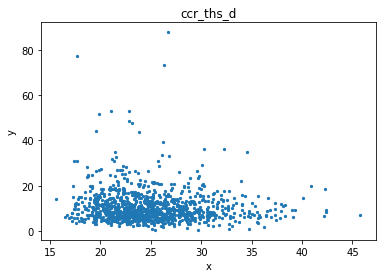

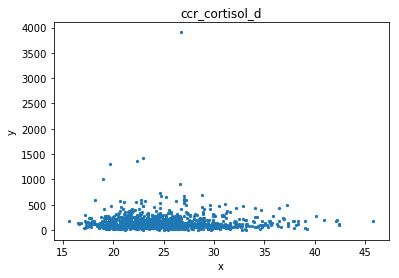

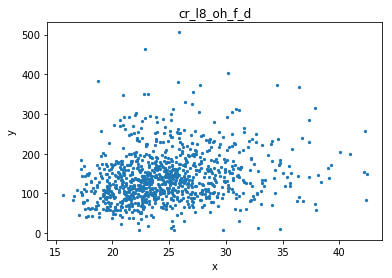

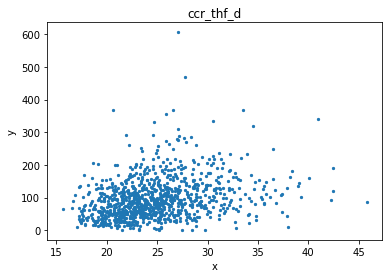

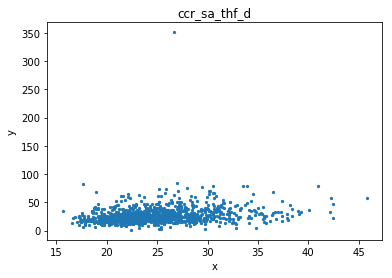

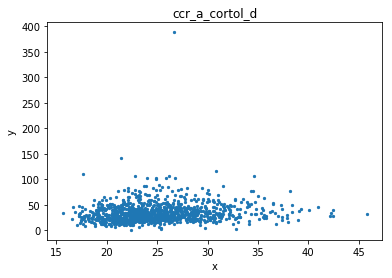

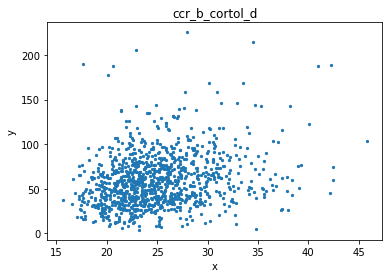

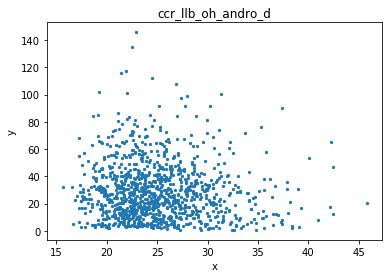

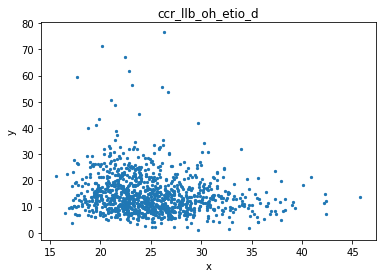

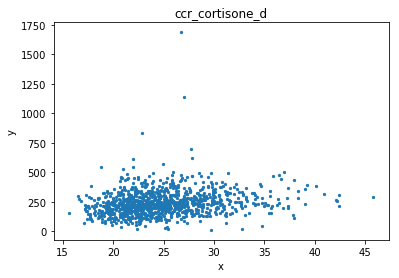

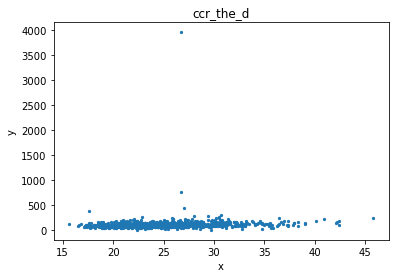

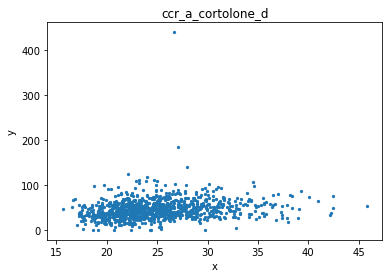

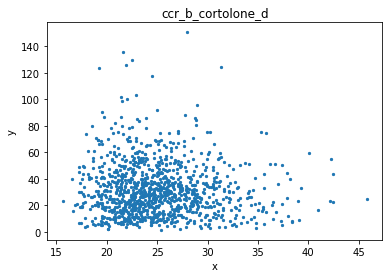

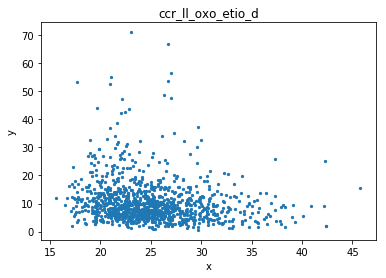

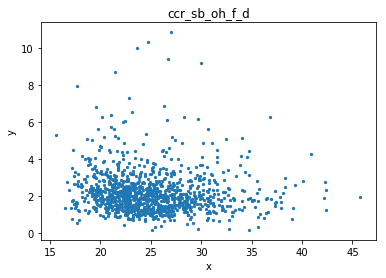

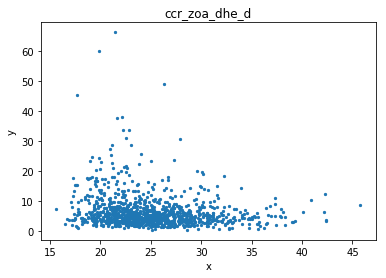

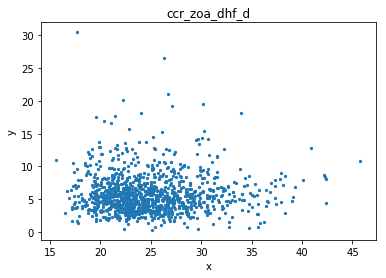

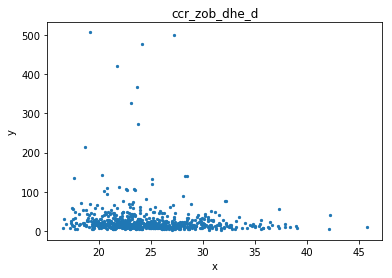

In [6]:

#print dataset[1,1:-1]
#print len(dataset[1,1:-1])


#print type(dataset)

datasetFloat = []
datasetFloat.append(dataset[0])


for line in dataset[1:]:
    tmp = []
    #print line[:]
    for col in line:
        #print "col: " + col
        if(col == ""):
            tmp.append(None)
        else:
            
            tmp.append(float(col))
    
    datasetFloat.append(tmp)

datasetFloat = np.array(datasetFloat)
        
print datasetFloat[1:,1]
print datasetFloat[1:,2]
print datasetFloat[1:,-1]


#print datasetFloat
    
# pour chaque steroid


for i in range(len(dataset[1,1:-1])):
    
    x = datasetFloat[1:,-1]
    y = datasetFloat[1:,i+1]
    
    

    
    plt.scatter(x,y,s=5)

    plt.title(dataset[0,i])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.savefig('ScatterPlot.png')
    plt.show()
 